In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import load_dat_file

filepath = r"gas+sensor+array+drift+dataset\Dataset\batch1.dat"
df = load_dat_file(filepath)
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f120,f121,f122,f123,f124,f125,f126,f127,f128,label
0,15596.1621,1.868245,2.371604,2.803678,7.512213,-2.739388,-3.344671,-4.847512,15326.6914,1.768526,...,-3.037772,3037.0390,3.972203,0.527291,0.728443,1.445783,-0.545079,-0.902241,-2.654529,1
1,26402.0704,2.532401,5.411209,6.509906,7.658469,-4.722217,-5.817651,-7.518333,23855.7812,2.164706,...,-1.994993,4176.4453,4.281373,0.980205,1.628050,1.951172,-0.889333,-1.323505,-1.749225,1
2,42103.5820,3.454189,8.198175,10.508439,11.611003,-7.668313,-9.478675,-12.230939,37562.3008,2.840403,...,-2.867291,5914.6685,5.396827,1.403973,2.476956,3.039841,-1.334558,-1.993659,-2.348370,1
3,42825.9883,3.451192,12.113940,16.266853,39.910056,-7.849409,-9.689894,-11.921704,38379.0664,2.851173,...,-3.058086,6147.4744,5.501071,1.981933,3.569823,4.049197,-1.432205,-2.146158,-2.488957,1
4,58151.1757,4.194839,11.455096,15.715298,17.654915,-11.083364,-13.580692,-16.407848,51975.5899,3.480866,...,-4.181920,8158.6449,7.174334,1.993808,3.829303,4.402448,-1.930107,-2.931265,-4.088756,1


In [3]:
print(df.shape)
print(df.info())
print(df.describe())

(445, 129)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Columns: 129 entries, f1 to label
dtypes: float64(128), int64(1)
memory usage: 448.6 KB
None
                  f1          f2          f3          f4          f5  \
count     445.000000  445.000000  445.000000  445.000000  445.000000   
mean   125598.154467    6.105952   27.857710   38.144605   44.128000   
std    154508.292267    4.888478   34.411330   46.167415   56.617419   
min      -518.410100    0.975693    0.237609    0.385293    1.691446   
25%     13925.168000    1.644067    3.469116    4.744795    5.876002   
50%     73888.513600    4.937347   14.722279   19.372862   21.541595   
75%    163294.027300    9.785838   37.921243   55.857809   60.098814   
max    670687.347700   25.289719  167.079751  226.619457  393.564132   

               f6          f7          f8             f9         f10  ...  \
count  445.000000  445.000000  445.000000     445.000000  445.000000  ...   
mean   -22.588372  -2

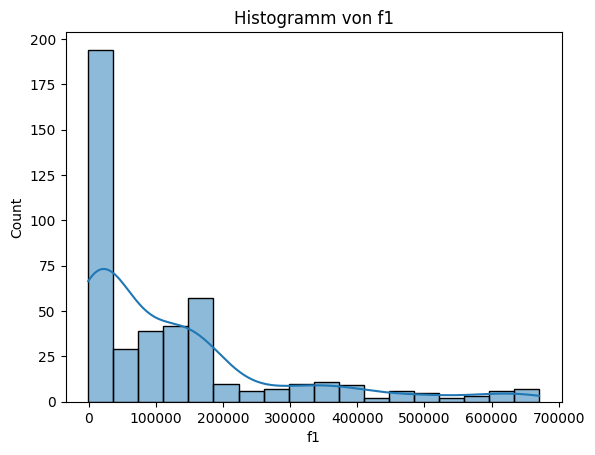

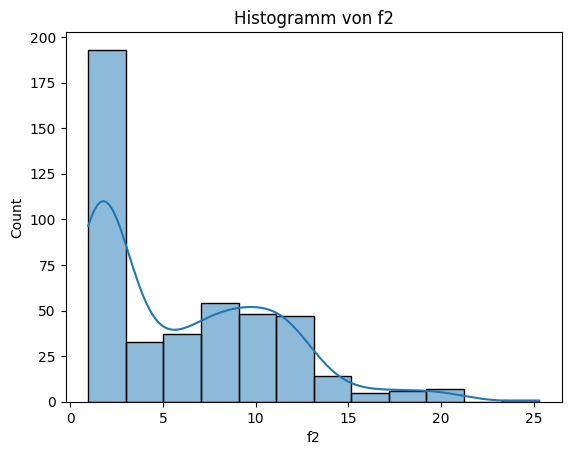

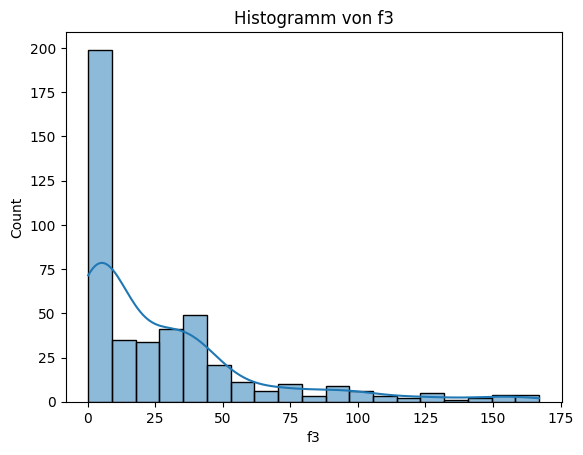

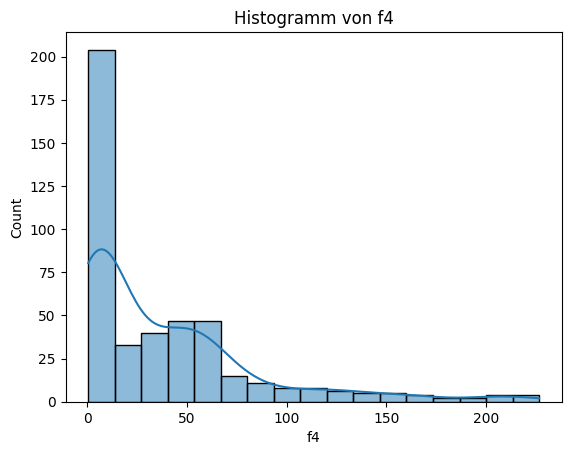

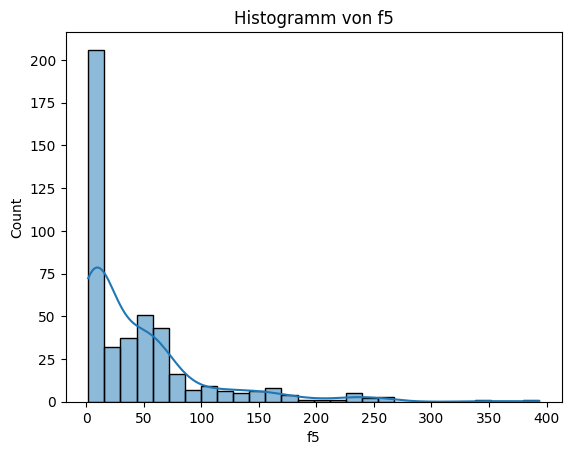

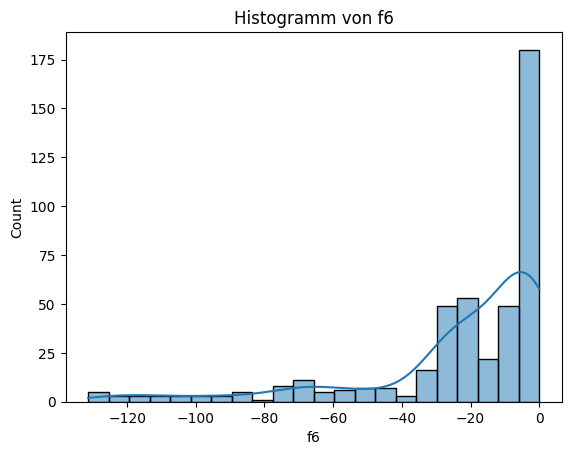

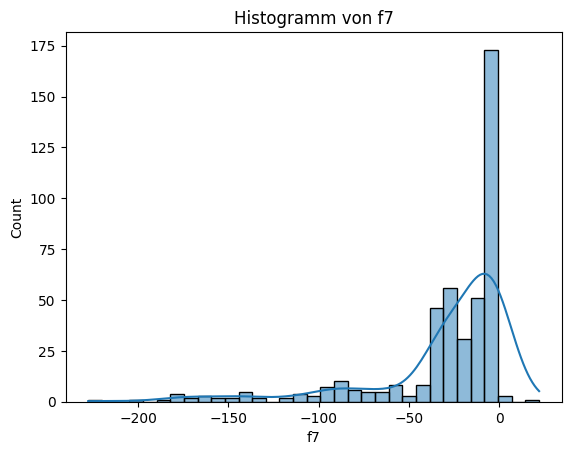

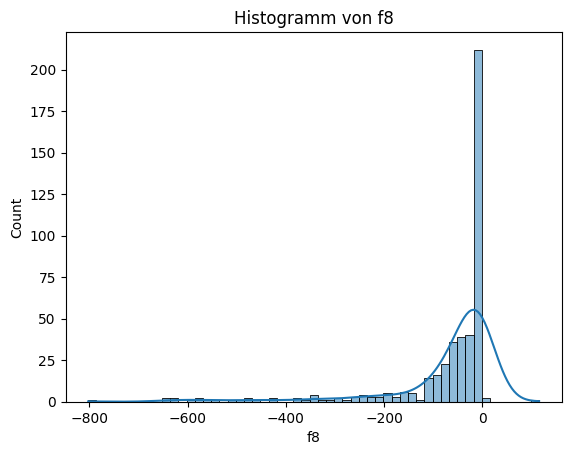

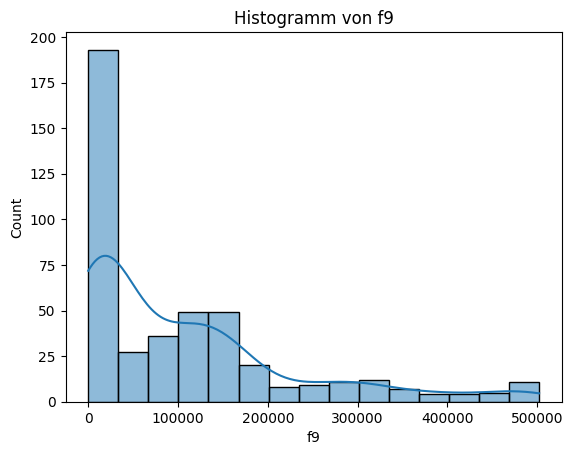

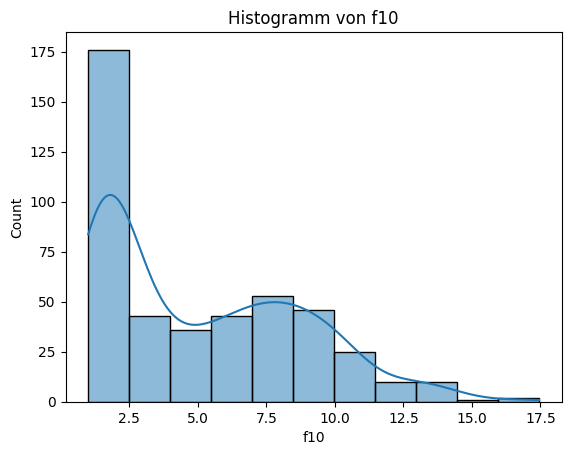

In [4]:
# Histogramme für 10 Features erstmal
features = df.drop(columns=['label'])

for feature in features.columns[:10]:
    plt.figure()
    sns.histplot(df[feature], kde=True)
    plt.title(f"Histogramm von {feature}")
    plt.show()

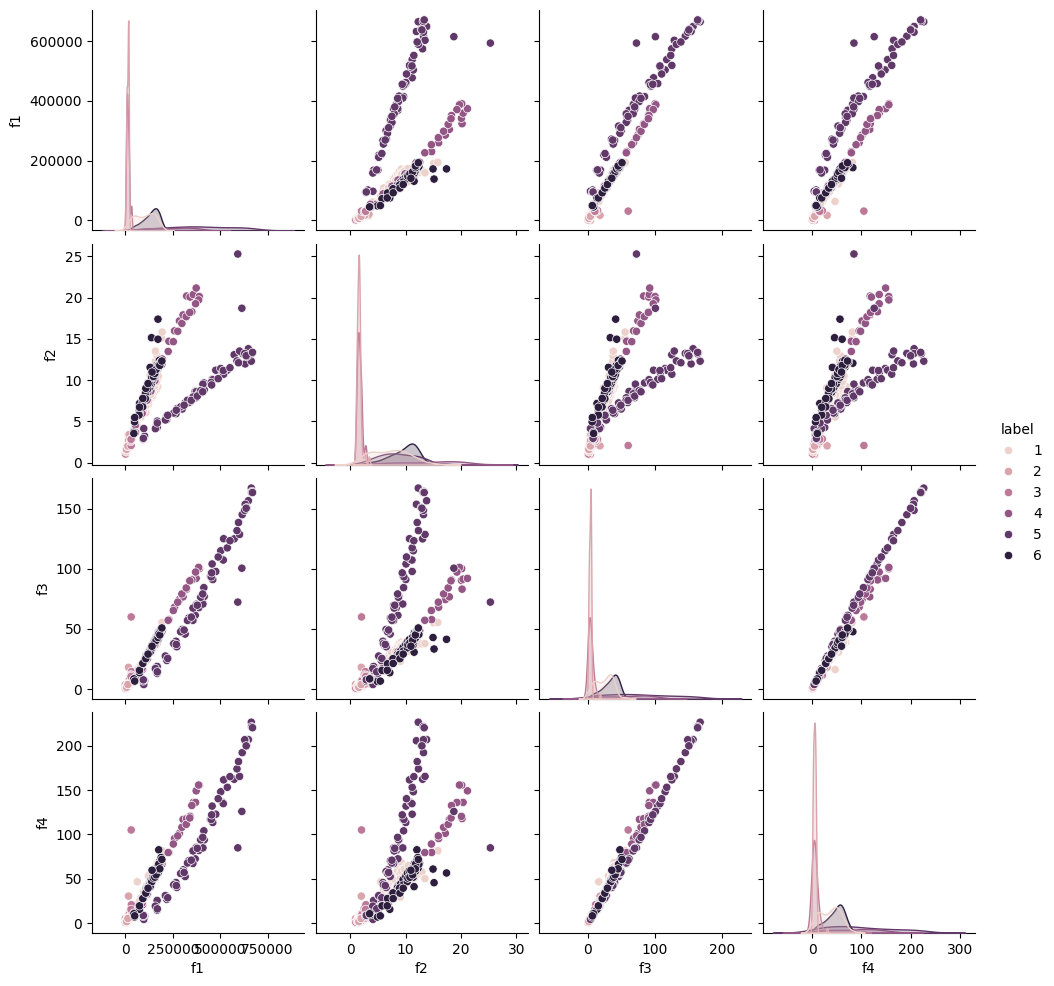

In [5]:
# Pairplot für ein paar Features + label als Hue
sample_features = ['f1', 'f2', 'f3', 'f4', 'label']
sns.pairplot(df[sample_features], hue='label')
plt.show()

In [7]:
# Datenreinigung (Fehlende Werte sind nativ nicht enthalten, aber dennoch)
pd.set_option('display.max_rows', None) # Alle Features anzeigen, statt Mitte abzuschneiden
print(df.isnull().sum())

f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
f7       0
f8       0
f9       0
f10      0
f11      0
f12      0
f13      0
f14      0
f15      0
f16      0
f17      0
f18      0
f19      0
f20      0
f21      0
f22      0
f23      0
f24      0
f25      0
f26      0
f27      0
f28      0
f29      0
f30      0
f31      0
f32      0
f33      0
f34      0
f35      0
f36      0
f37      0
f38      0
f39      0
f40      0
f41      0
f42      0
f43      0
f44      0
f45      0
f46      0
f47      0
f48      0
f49      0
f50      0
f51      0
f52      0
f53      0
f54      0
f55      0
f56      0
f57      0
f58      0
f59      0
f60      0
f61      0
f62      0
f63      0
f64      0
f65      0
f66      0
f67      0
f68      0
f69      0
f70      0
f71      0
f72      0
f73      0
f74      0
f75      0
f76      0
f77      0
f78      0
f79      0
f80      0
f81      0
f82      0
f83      0
f84      0
f85      0
f86      0
f87      0
f88      0
f89      0
f90      0
f91      0

In [10]:
# Ausreißererkennung; IQR

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(outliers.sort_values(ascending=False)) 

f7       54
f8       53
f80      51
f6       51
f79      46
f15      44
f16      43
f14      40
f78      39
f72      39
f71      38
f1       36
f3       36
f5       33
f70      30
f92      29
f9       29
f73      28
f4       27
f13      25
f11      25
f69      25
f67      24
f93      24
f65      24
f68      23
f12      23
f77      23
f28      22
f35      20
f76      20
f24      20
f75      20
f99      20
f23      19
f43      19
f88      18
f87      17
f40      16
f84      16
f29      16
f85      16
f107     15
f21      15
f26      15
f20      14
f31      14
f82      14
f32      14
f90      14
f120     13
f117     13
f96      13
f18      13
f53      13
f124     12
f128     12
f104     12
f125     12
f86      12
f116     12
f60      11
f61      11
f91      11
f30      11
f48      11
f22      11
f52      10
f121     10
f126      9
f37       9
f95       9
f56       9
f118      9
f114      9
f64       8
f112      8
f113      8
f127      7
f44       7
f54       7
f49       7
f122      6
f94 

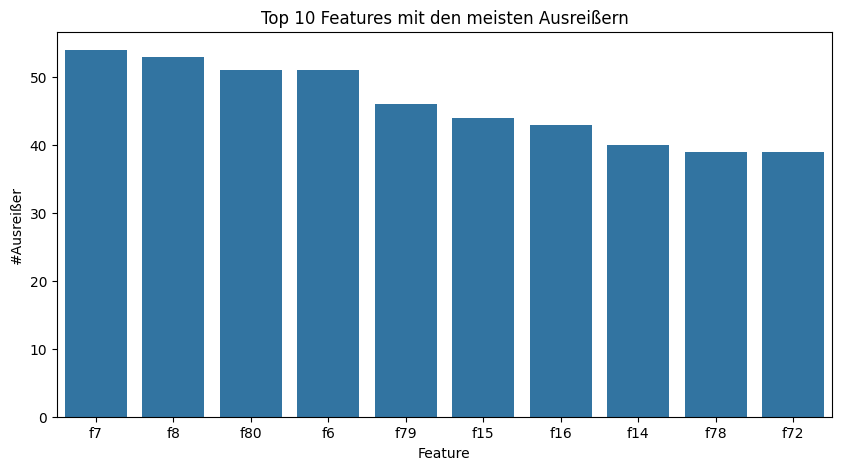

In [11]:
# Visuelle Grafik mit N größten Ausreißern
# Sortiere nach meisten Ausreißern
n = 10
top_outliers = outliers.sort_values(ascending=False).head(n)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_outliers.index, y=top_outliers.values)
plt.title(f"Top {n} Features mit den meisten Ausreißern")
plt.xlabel("Feature")
plt.ylabel("#Ausreißer")
plt.show()

In [5]:
# Nur als visuelle Inspektion der Anzahl der vorkommenden Gasarten
class_counts = df.iloc[:, 128].value_counts().sort_index
print(class_counts)

<bound method Series.sort_index of label
2    98
1    90
3    83
6    74
5    70
4    30
Name: count, dtype: int64>
